In [59]:
import numpy as np
import seaborn as sn
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


In [13]:
record=pd.read_csv('train.csv')
record

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,21/05/2017,28/05/2017,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980
9796,9797,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680
9797,9798,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880
9798,9799,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760


In [15]:
record.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [16]:
record.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [19]:
record.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='object')

In [20]:
record.describe()

,Row ID,Postal Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


In [21]:
record.sample(10)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
7529,7530,US-2018-106145,26/09/2018,26/09/2018,Same Day,RA-19885,Ruben Ausman,Corporate,United States,San Francisco,California,94109.0,West,OFF-BI-10002215,Office Supplies,Binders,"Wilson Jones Hanging View Binder, White, 1""",17.040
1009,1010,CA-2018-135034,01/08/2018,03/08/2018,First Class,AT-10735,Annie Thurman,Consumer,United States,Chicago,Illinois,60653.0,Central,TEC-PH-10003931,Technology,Phones,JBL Micro Wireless Portable Bluetooth Speaker,95.984
8404,8405,CA-2018-140480,08/07/2018,12/07/2018,Standard Class,HE-14800,Harold Engle,Corporate,United States,Newark,Delaware,19711.0,East,FUR-FU-10003247,Furniture,Furnishings,36X48 HARDFLOOR CHAIRMAT,83.920
1228,1229,CA-2018-100013,06/11/2018,11/11/2018,Standard Class,ZC-21910,Zuschuss Carroll,Consumer,United States,Los Angeles,California,90045.0,West,OFF-EN-10001219,Office Supplies,Envelopes,"#10- 4 1/8"" x 9 1/2"" Security-Tint Envelopes",15.280
3335,3336,US-2018-109253,21/08/2018,22/08/2018,First Class,PR-18880,Patrick Ryan,Consumer,United States,Oakland,California,94601.0,West,TEC-PH-10004667,Technology,Phones,Cisco 8x8 Inc. 6753i IP Business Phone System,431.968
6623,6624,CA-2015-130449,06/09/2015,09/09/2015,First Class,VP-21760,Victoria Pisteka,Corporate,United States,San Francisco,California,94109.0,West,OFF-LA-10001934,Office Supplies,Labels,Avery 516,58.480
2598,2599,CA-2018-149048,13/05/2018,17/05/2018,Standard Class,BM-11650,Brian Moss,Corporate,United States,Columbus,Indiana,47201.0,Central,OFF-PA-10001752,Office Supplies,Paper,Hammermill CopyPlus Copy Paper (20Lb. and 84 B...,14.940
513,514,CA-2018-163405,21/12/2018,25/12/2018,Standard Class,BN-11515,Bradley Nguyen,Consumer,United States,Los Angeles,California,90049.0,West,OFF-AR-10003811,Office Supplies,Art,Newell 327,6.630
8823,8824,CA-2018-100622,03/11/2018,07/11/2018,Standard Class,DK-13090,Dave Kipp,Consumer,United States,Orlando,Florida,32839.0,South,OFF-PA-10002947,Office Supplies,Paper,Xerox 1923,10.688
124,125,US-2015-152030,26/12/2015,28/12/2015,Second Class,AD-10180,Alan Dominguez,Home Office,United States,Houston,Texas,77041.0,Central,FUR-CH-10004063,Furniture,Chairs,Global Deluxe High-Back Manager's Chair,600.558


<Axes: ylabel='Ship Mode'>

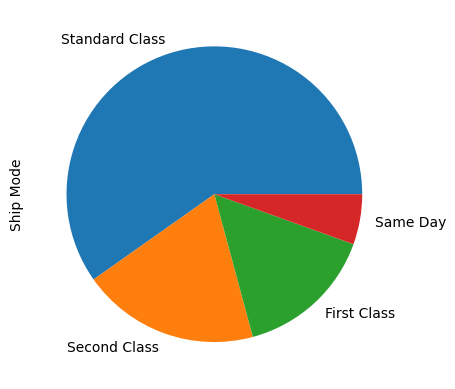

In [22]:
record["Ship Mode"].value_counts().plot.pie()

<Axes: ylabel='Segment'>

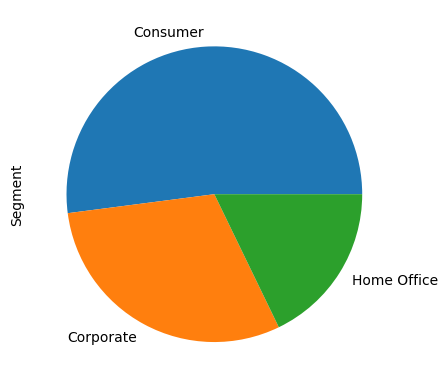

In [27]:
record["Segment"].value_counts().plot.pie()

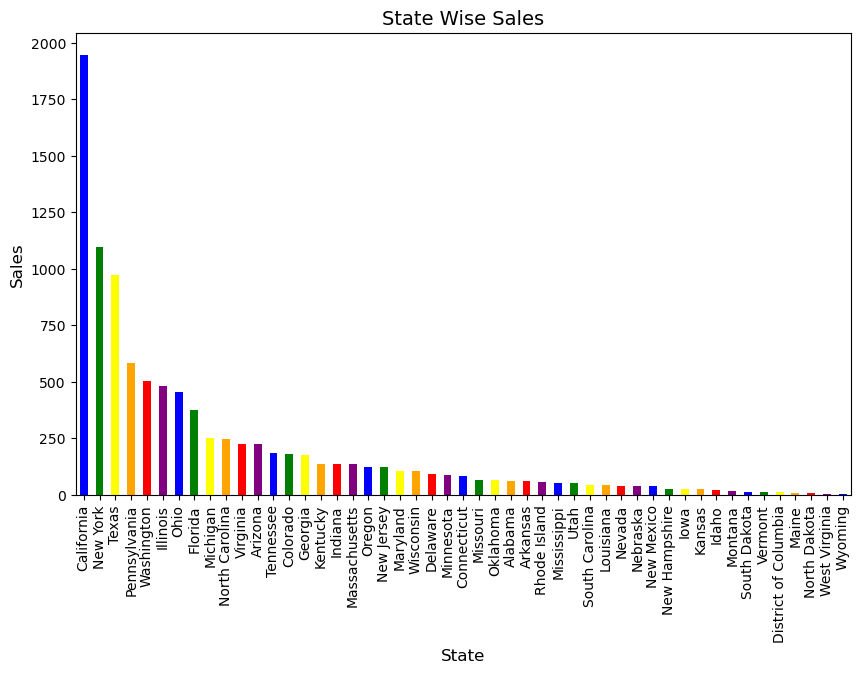

In [39]:
state_counts = record['State'].value_counts()
colors = ['blue', 'green','yellow', 'orange', 'red', 'purple']
plt.figure(figsize=(10, 6))
plt.xticks(rotation='vertical')
state_counts.plot(kind='bar', color=colors)
plt.xlabel('State', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.title('State Wise Sales', fontsize=14)
plt.show()

<Axes: xlabel='Sub-Category', ylabel='count'>

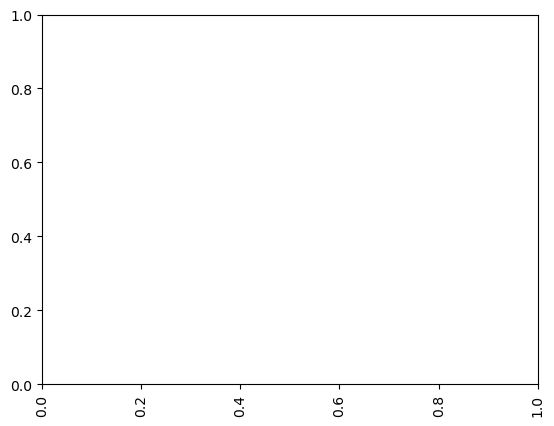

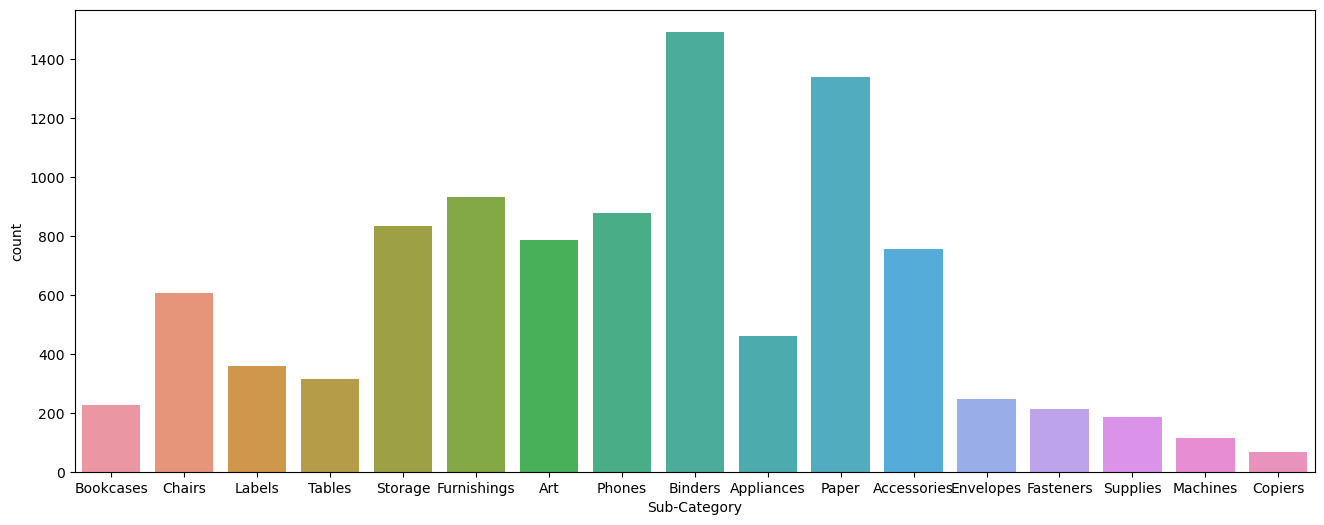

In [31]:
plt.xticks(rotation='vertical')
plt.figure(figsize=(16,6))
sns.countplot(x="Sub-Category",data=record)

In [40]:
def check(record):
    l=[]
    columns=record.columns
    for col in columns:
        dtypes=record[col].dtypes
        nunique=record[col].nunique()
        sum_null=record[col].isnull().sum()
        l.append([col,dtypes,nunique,sum_null])
    record_check=pd.DataFrame(l)
    record_check.columns=['column','dtypes','nunique','sum_null']
    return record_check 
check(record)

,column,dtypes,nunique,sum_null
0,Row ID,int64,9800,0
1,Order ID,object,4922,0
2,Order Date,object,1230,0
3,Ship Date,object,1326,0
4,Ship Mode,object,4,0
5,Customer ID,object,793,0
6,Customer Name,object,793,0
7,Segment,object,3,0
8,Country,object,1,0
9,City,object,529,0


In [42]:
#Burlington city Postal Code is 27219
record["Postal Code"]=record["Postal Code"].fillna(27219.0)

In [43]:
def check(record):
    l=[]
    columns=record.columns
    for col in columns:
        dtypes=record[col].dtypes
        nunique=record[col].nunique()
        sum_null=record[col].isnull().sum()
        l.append([col,dtypes,nunique,sum_null])
    record_check=pd.DataFrame(l)
    record_check.columns=['column','dtypes','nunique','sum_null']
    return record_check 
check(record)

,column,dtypes,nunique,sum_null
0,Row ID,int64,9800,0
1,Order ID,object,4922,0
2,Order Date,object,1230,0
3,Ship Date,object,1326,0
4,Ship Mode,object,4,0
5,Customer ID,object,793,0
6,Customer Name,object,793,0
7,Segment,object,3,0
8,Country,object,1,0
9,City,object,529,0


In [53]:
# create additional column of day, month and year
data['Year'] = pd.DatetimeIndex(data['Order Date']).year
data['Month'] = pd.DatetimeIndex(data['Order Date']).month
data['Day'] = pd.DatetimeIndex(data['Order Date']).day

NameError: name 'data' is not defined

In [76]:
record['Order Date'] = pd.to_datetime(record['Order Date'], format='%d/%m/%Y')

In [80]:
record['Ship Date'] = pd.to_datetime(record['Ship Date'], format='%d/%m/%Y')

In [81]:
# create additional column of day, month and year
record['Year'] = pd.DatetimeIndex(record['Order Date']).year
record['Month'] = pd.DatetimeIndex(record['Order Date']).month
record['Day'] = pd.DatetimeIndex(record['Order Date']).day

In [82]:
#where '%A' is a format code that represents the full name of the day of the week (e.g., Monday, Tuesday, etc.).
record['Day of Week'] = record['Order Date'].dt.strftime('%A')
print(record['Day of Week'])

0       Wednesday
1       Wednesday
2          Monday
3         Tuesday
4         Tuesday
          ...    
9795       Sunday
9796      Tuesday
9797      Tuesday
9798      Tuesday
9799      Tuesday
Name: Day of Week, Length: 9800, dtype: object


array([[<Axes: title={'center': 'Order Date'}>,
        <Axes: title={'center': 'Ship Date'}>],
       [<Axes: title={'center': 'Sales'}>,
        <Axes: title={'center': 'Year'}>],
       [<Axes: title={'center': 'Month'}>,
        <Axes: title={'center': 'Day'}>]], dtype=object)

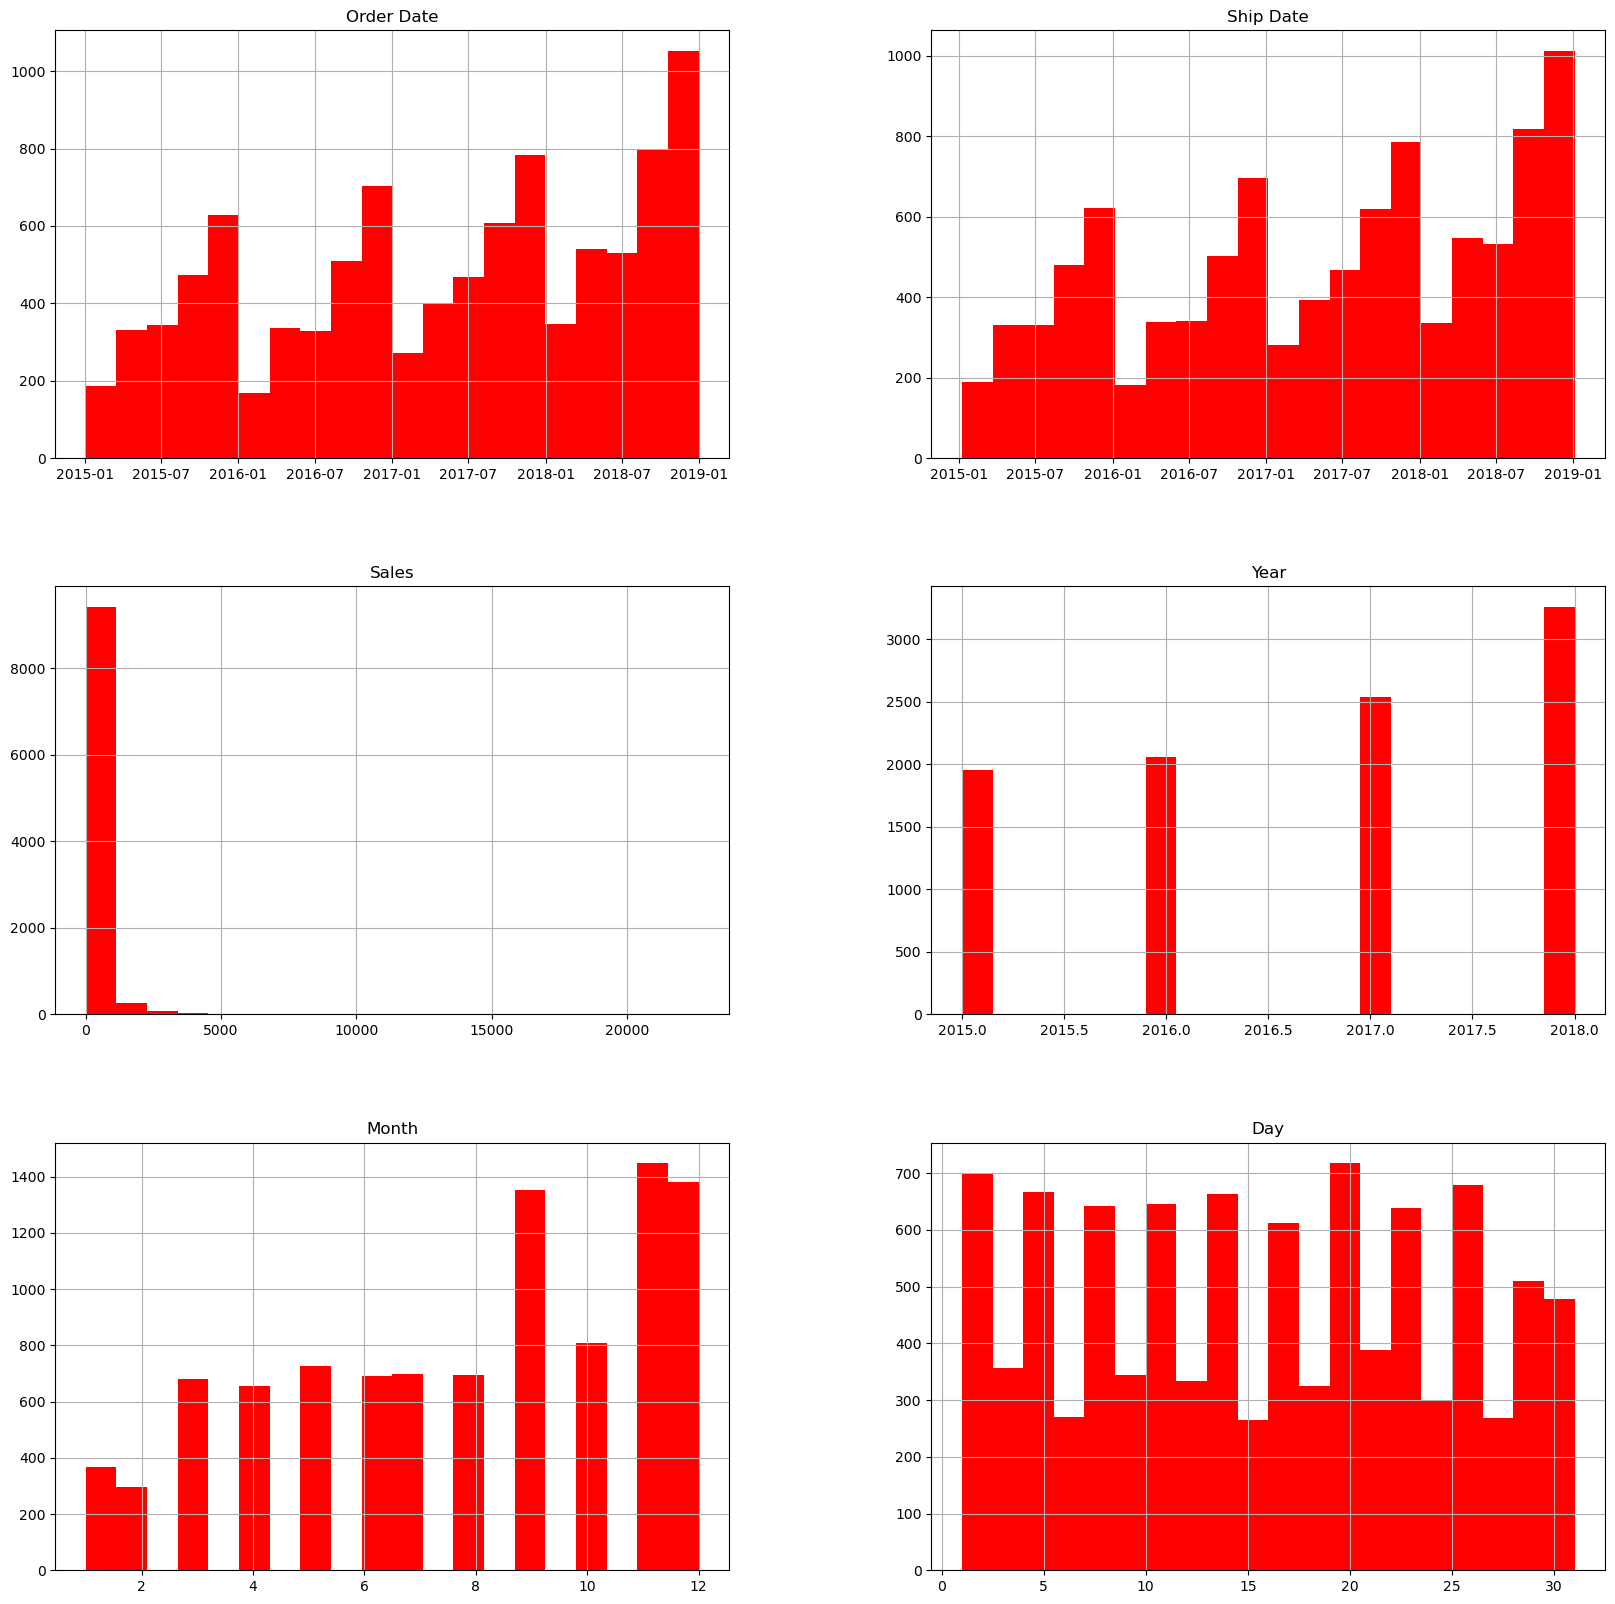

In [89]:
record[['Order Date' , 'Ship Date' , 'Sales' , 'Year', 'Month', 'Day']].hist(bins=20 ,figsize = (20,20),color= 'red')

C:\Users\imnit\AppData\Local\Temp\ipykernel_9772\909176161.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(record['Month'],color= 'black')


Text(0.5, 1.0, 'Month Histogram')

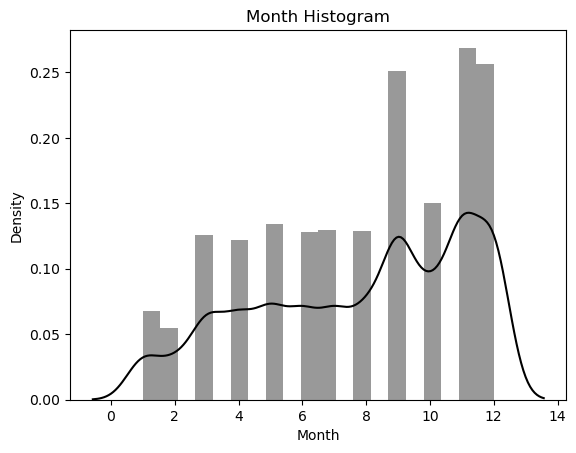

In [91]:
sns.distplot(record['Month'],color= 'black')
plt.title('Month Histogram')

In [92]:
best_customer = record.pivot_table(values = "Sales" , index = "Customer Name" , aggfunc = "sum")
best_customer = best_customer.sort_values(by=['Sales'], ascending=False).head(15)
best_customer.reset_index(inplace=True) # we will have to reset the index to add the customer name into dataframe 
best_customer['Sales']=best_customer['Sales'].round(2)
best_customer

,Customer Name,Sales
0,Sean Miller,25043.05
1,Tamara Chand,19052.22
2,Raymond Buch,15117.34
3,Tom Ashbrook,14595.62
4,Adrian Barton,14473.57
5,Ken Lonsdale,14175.23
6,Sanjit Chand,14142.33
7,Hunter Lopez,12873.30
8,Sanjit Engle,12209.44
9,Christopher Conant,12129.07


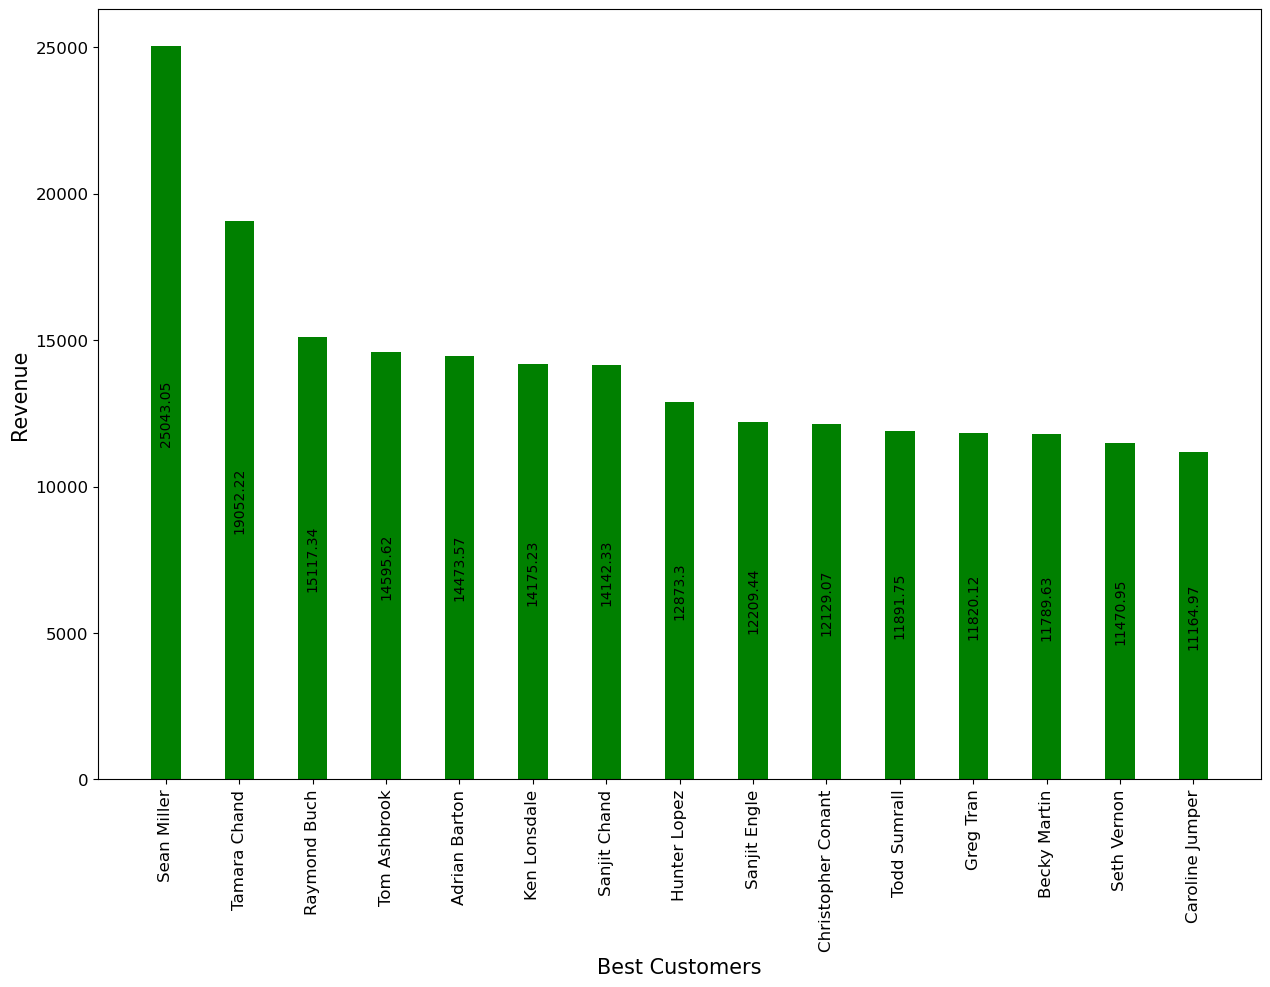

In [95]:
fig = plt.figure(figsize = (15, 10))
 
# creating the bar plot
plt.bar(best_customer['Customer Name'],best_customer['Sales'] ,width = 0.4,color= 'green')
 
plt.xlabel("Best Customers",fontsize=15)
plt.ylabel("Revenue",fontsize=15)
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)

for i , v in enumerate(best_customer['Sales']):
    plt.text(i, v/2 , str(v) , ha='center' , va='center' , rotation=90 , color='black')
plt.show()

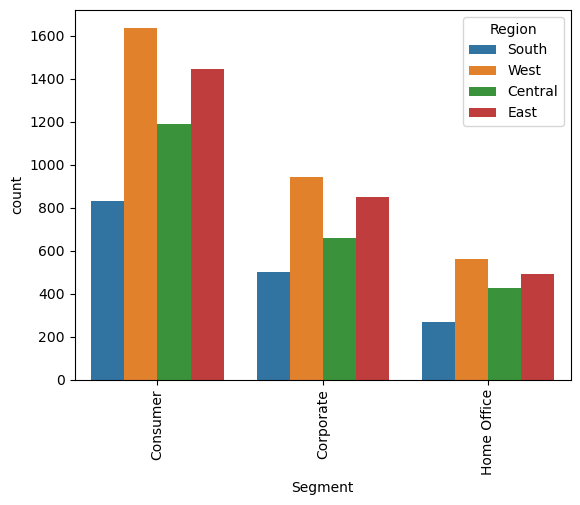

In [98]:
sns.countplot(data=record,x="Segment",hue='Region')
plt.xticks(rotation=90)
plt.show()

<Figure size 640x480 with 0 Axes>

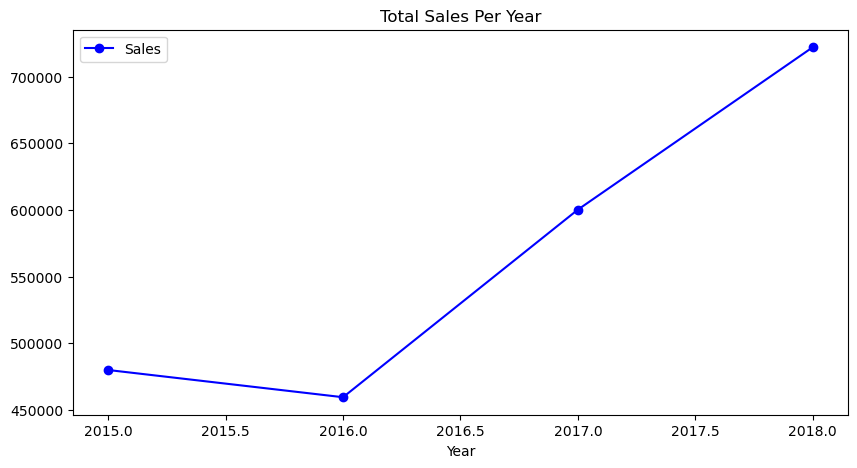

<Figure size 640x480 with 0 Axes>

In [102]:
axis = record.groupby('Year')[['Sales']].sum().plot(figsize = (10,5), marker = 'o', color = 'b')
axis.set_title('Total Sales Per Year')

plt.figure()

<Figure size 640x480 with 0 Axes>

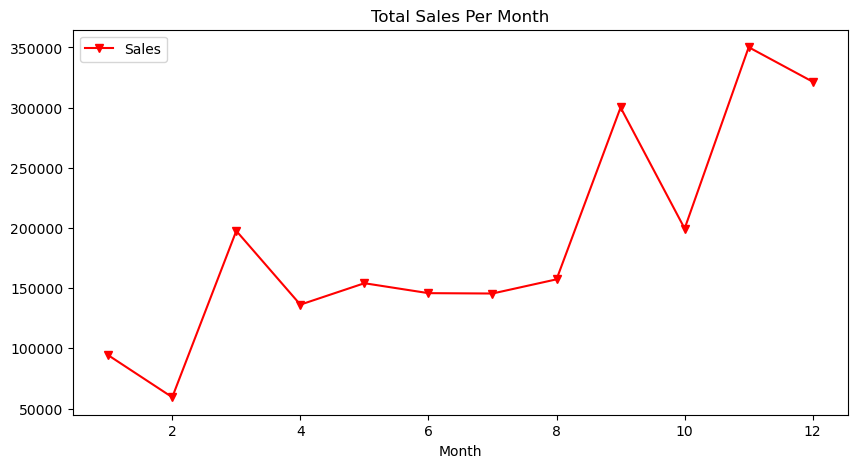

<Figure size 640x480 with 0 Axes>

In [103]:
axis = record.groupby('Month')[['Sales']].sum().plot(figsize = (10,5), marker = 'v', color = 'r')
axis.set_title('Total Sales Per Month')

plt.figure()

<Figure size 640x480 with 0 Axes>

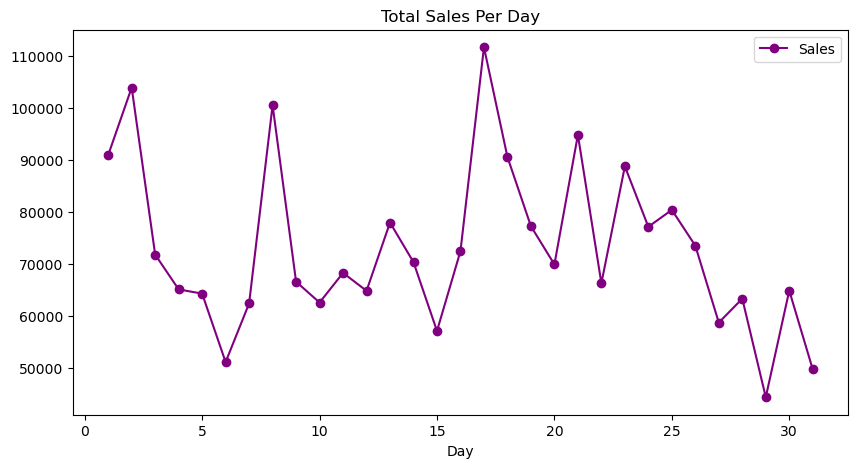

<Figure size 640x480 with 0 Axes>

In [105]:
axis = record.groupby('Day')[['Sales']].sum().plot(figsize = (10,5), marker = 'o', color = 'purple')
axis.set_title('Total Sales Per Day')

plt.figure()